In [41]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt


In [42]:
nao_df = pd.read_csv('../../../data/noaa/norm.nao.monthly.b5001.current.ascii', sep='\s+', names=['year', 'month', 'NAO'])
nao_df['year'] = nao['year'].astype('int')
nao_df['month'] = nao['month'].astype('int')
# we put the representative date at the start of the month

nao_df['date'] = nao_df.apply(lambda row: datetime.datetime(int(row['year']), int(row['month']), 1), axis=1)


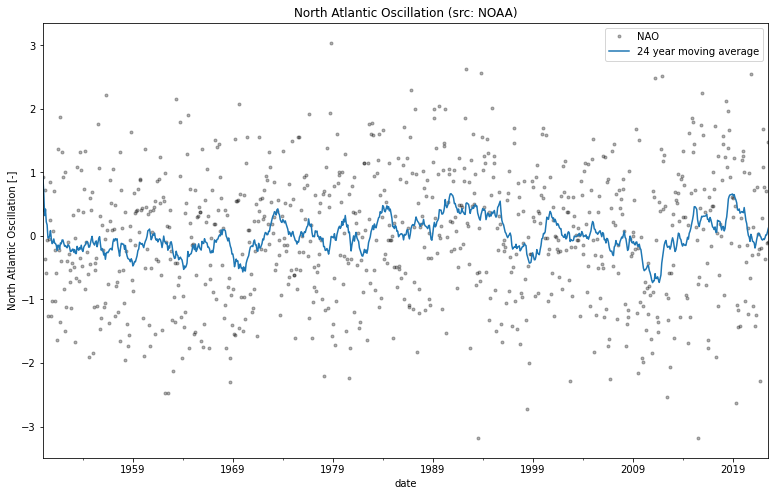

In [50]:
fig, ax = plt.subplots(figsize=(13, 8))
# not sure why, but we also show the 2 year running mean
# Show the monthly NAO
nao_df.plot('date', 'NAO', alpha=0.3, style='k.', ax=ax)
nao_df.set_index('date').rolling(datetime.timedelta(days=365 * 2)).mean()['NAO'].plot(label='24 year moving average', ax=ax)
ax.legend()
ax.set_ylabel('North Atlantic Oscillation [-]')
ax.set_title('North Atlantic Oscillation (src: NOAA)')
fig.savefig('nao.pdf')
fig.savefig('nao.png')
